In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("data/raw_data.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Without preproccesing

In [4]:
df.Attrition.replace({'Yes': 1, 'No': 0}, inplace=True)

df.BusinessTravel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace=True)

df.Department.replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}, inplace=True)

df.Gender.replace({'Female': 0, 'Male': 1}, inplace=True)

df.MaritalStatus.replace({'Single': 0,'Married': 1, 'Divorced': 2}, inplace=True)

df.OverTime.replace({'No': 0, 'Yes': 1}, inplace=True)

df.EducationField.replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5}, inplace=True)

df.JobRole.replace({
'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2,'Manufacturing Director': 3,'Healthcare Representative': 4,'Manager': 5,
    'Sales Representative': 6,'Research Director': 7,'Human Resources': 8
}, inplace=True)

df.Over18.replace({
    'Y': 1
}, inplace=True)

In [5]:
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

In [6]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,0,1,2,0,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,2,279,1,8,1,0,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,5,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,2,1392,1,3,4,0,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,1,591,1,2,1,1,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, shuffle =True)



In [8]:
from sklearn.ensemble import GradientBoostingClassifier


GBCModel = GradientBoostingClassifier(n_estimators=75,max_depth=6) 
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)
# print('Predicted Value for GBCModel is : ' , y_pred[:10])

GBCModel Train Score is :  1.0
GBCModel Test Score is :  0.8616780045351474
----------------------------------------------------


In [9]:
GBCModel

GradientBoostingClassifier(max_depth=6, n_estimators=75)

In [10]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

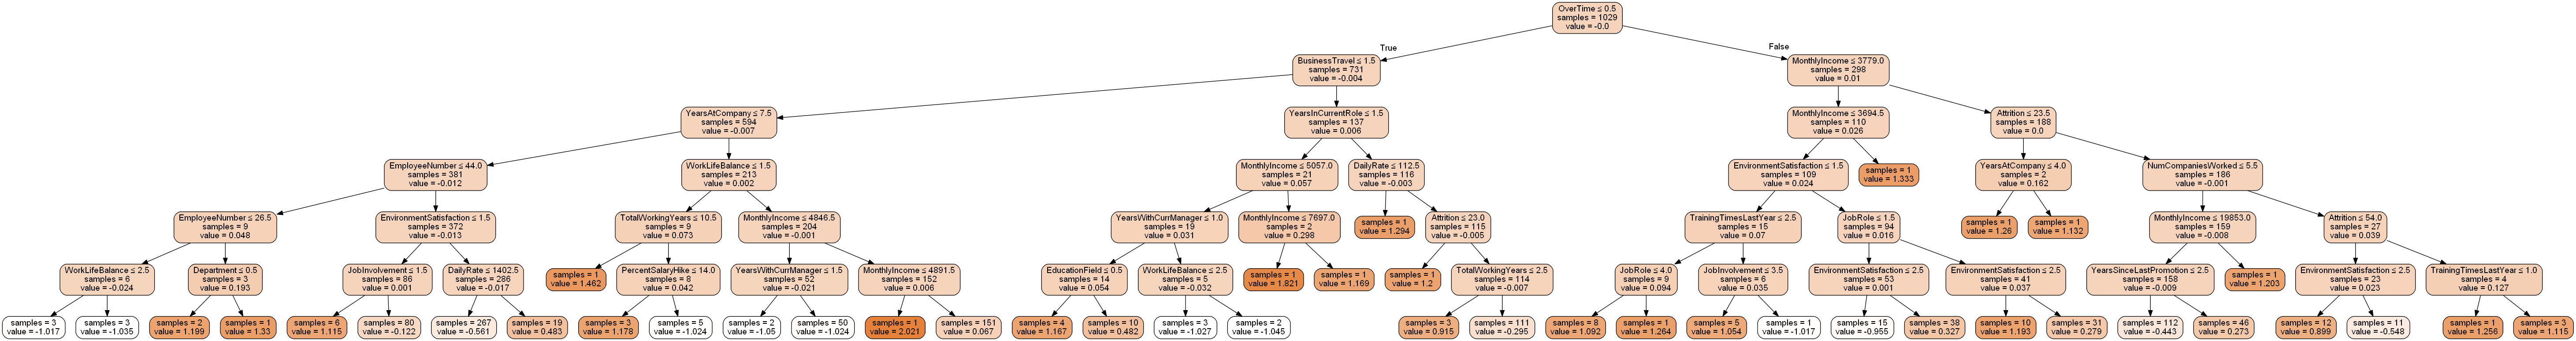

In [11]:
sub_tree_42 = GBCModel.estimators_[42, 0]

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    feature_names=df.columns[1:],
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
plt = Image(graph.create_png())
display(plt)

Confusion Matrix is : 
 [[368  12]
 [ 49  12]]


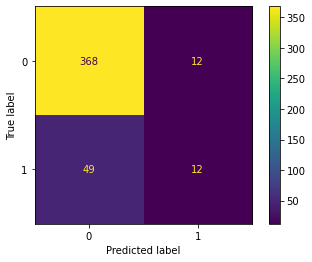

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(GBCModel, X_test, y_test)  

# #Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# # drawing confusion matrixtab20c
# sns.heatmap(CM, center = True ,cmap='PuBu')
# plt.show()

# after pre

In [13]:
df = pd.read_csv("data_outliers.csv")
df.head()

,AvgWorkingYears,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1.000000,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Low,0,8,0,Bad,6,4,0,5,Yes
1,10.000000,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Very High,1,10,3,Better,10,7,1,7,No
2,1.166667,37,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Medium,0,7,3,Better,0,0,0,0,Yes
3,8.000000,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,High,0,8,3,Better,8,7,3,0,No
4,3.000000,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Very High,1,6,3,Better,2,2,2,2,No


In [14]:
df.drop(['AvgWorkingYears'], axis="columns", inplace=True)

df.Attrition.replace({'Yes': 1, 'No': 0}, inplace=True)

df.BusinessTravel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace=True)

df.Department.replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}, inplace=True)

df.Gender.replace({'Female': 0, 'Male': 1}, inplace=True)

df.MaritalStatus.replace({'Single': 0,'Married': 1, 'Divorced': 2}, inplace=True)

df.OverTime.replace({'No': 0, 'Yes': 1}, inplace=True)

df.EducationField.replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5}, inplace=True)

df.JobRole.replace({
'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2,'Manufacturing Director': 3,'Healthcare Representative': 4,'Manager': 5,
    'Sales Representative': 6,'Research Director': 7,'Human Resources': 8
}, inplace=True)

df.Education.replace({
'Below College': 1, 'College': 2, 'Bachelor': 3, 'Master': 4, 'Doctor': 5
}, inplace=True)

df.EnvironmentSatisfaction.replace({
'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4
    }, inplace=True)

df.JobInvolvement.replace({
'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4    
    }, inplace=True)


df.JobSatisfaction.replace({
'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4    
    }, inplace=True)


df.PerformanceRating.replace({
'Low': 1, 'Good': 2, 'Excellent': 3, 'Outstanding': 4    
    }, inplace=True)


df.RelationshipSatisfaction.replace({
'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4    
    }, inplace=True)


df.WorkLifeBalance.replace({
 'Bad': 1, 'Good': 2, 'Better': 3, 'Best': 4     
    }, inplace=True)



In [15]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,1102,0,1,2,0,2,0,94,...,1,0,8,0,1,6,4,0,5,1
1,49,2,279,1,8,1,0,3,1,61,...,4,1,10,3,3,10,7,1,7,0
2,37,1,1373,1,2,2,5,4,1,92,...,2,0,7,3,3,0,0,0,0,1
3,33,2,1392,1,3,4,0,4,0,56,...,3,0,8,3,3,8,7,3,0,0
4,27,1,591,1,2,1,1,1,1,40,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,1,23,2,1,3,1,41,...,3,1,17,3,3,5,2,0,3,0
1466,39,1,613,1,6,1,1,4,1,42,...,1,1,9,5,3,7,7,1,7,0
1467,27,1,155,1,4,3,0,2,1,87,...,2,1,6,0,3,6,2,0,3,0
1468,49,2,1023,0,2,3,1,4,1,63,...,4,0,17,3,2,9,6,0,8,0


In [16]:
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, shuffle =True)


In [18]:
tests_scores = []
for i in range(5):
    tests_scores.append([])
i = 0
for tree_n in [50, 75, 100, 150, 200]:
    for depth in [4, 6, 8, 10, 12]:
        GBCModel = GradientBoostingClassifier(n_estimators=tree_n,max_depth=depth) 
        GBCModel.fit(X_train, y_train)
        
        tests_scores[i].append(round(GBCModel.score(X_test, y_test), 3))
    i+=1
 

In [19]:
print(*tests_scores)

[0.864, 0.871, 0.866, 0.873, 0.848] [0.868, 0.866, 0.866, 0.855, 0.85] [0.873, 0.866, 0.871, 0.857, 0.846] [0.866, 0.864, 0.868, 0.848, 0.839] [0.875, 0.862, 0.862, 0.864, 0.825]


In [20]:
from sklearn.ensemble import GradientBoostingClassifier


GBCModel = GradientBoostingClassifier(n_estimators=75,max_depth=6) 
GBCModel.fit(X_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = GBCModel.predict(X_test)
y_pred_prob = GBCModel.predict_proba(X_test)
# print('Predicted Value for GBCModel is : ' , y_pred[:10])

GBCModel Train Score is :  1.0
GBCModel Test Score is :  0.8616780045351474
----------------------------------------------------


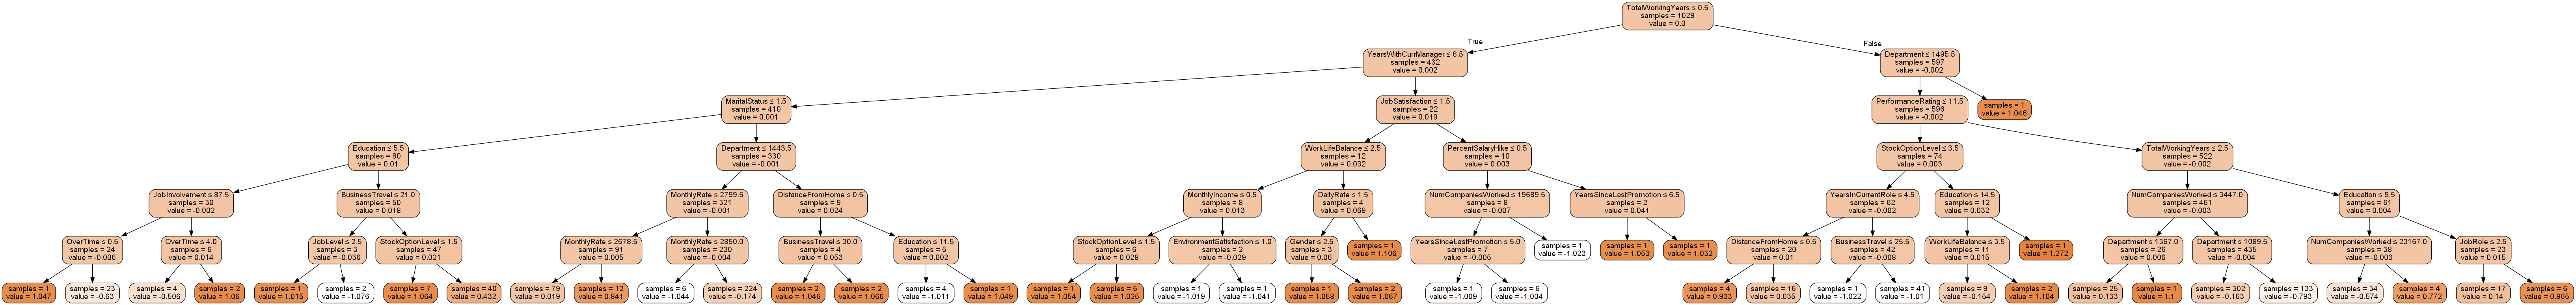

In [21]:
sub_tree_42 = GBCModel.estimators_[-1, 0]

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    feature_names=df.columns[1:],
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
plt = Image(graph.create_png())
display(plt)

In [22]:
from graphviz import Source
graph = Source(dot_data)

graph.format = 'png'

graph.render('dtree_render',view=True)

'dtree_render.png'